In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Improve visualization style
sns.set(style="whitegrid", palette="tab10")



In [4]:
# Load dataset
df = pd.read_csv("C:/Users/Absolomjr/Desktop/final year project dataset/Time-Series_Network_logs.csv")


In [5]:
print("Dataset Overview:")
display(df.head())

Dataset Overview:


,Timestamp,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,192.168.54.167,220.159.139.17,443,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,192.168.193.254,201.83.205.167,80,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,192.168.91.17,211.0.177.164,21,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,192.168.108.75,187.49.21.67,22,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,192.168.245.254,189.62.16.12,53,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal


In [6]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8866 entries, 0 to 8865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       8866 non-null   object
 1   Source_IP       8866 non-null   object
 2   Destination_IP  8866 non-null   object
 3   Port            8866 non-null   int64 
 4   Request_Type    8866 non-null   object
 5   Protocol        8866 non-null   object
 6   Payload_Size    8866 non-null   int64 
 7   User_Agent      8866 non-null   object
 8   Status          8866 non-null   object
 9   Intrusion       8866 non-null   int64 
 10  Scan_Type       8866 non-null   object
dtypes: int64(3), object(8)
memory usage: 762.1+ KB


In [7]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Timestamp         0
Source_IP         0
Destination_IP    0
Port              0
Request_Type      0
Protocol          0
Payload_Size      0
User_Agent        0
Status            0
Intrusion         0
Scan_Type         0
dtype: int64

In [21]:
df['Intrusion'].value_counts()


Intrusion
0    8000
1     866
Name: count, dtype: int64

In [8]:

print("\nSummary Statistics (numerical features):")
df.describe()


Summary Statistics (numerical features):


,Port,Payload_Size,Intrusion
count,8866.000000,8866.000000,8866.000000
mean,907.711820,1604.355854,0.097677
std,4127.679628,917.290464,0.296894
min,21.000000,0.000000,0.000000
25%,22.000000,846.250000,0.000000
50%,53.000000,1582.000000,0.000000
75%,80.000000,2326.000000,0.000000
max,31337.000000,4991.000000,1.000000


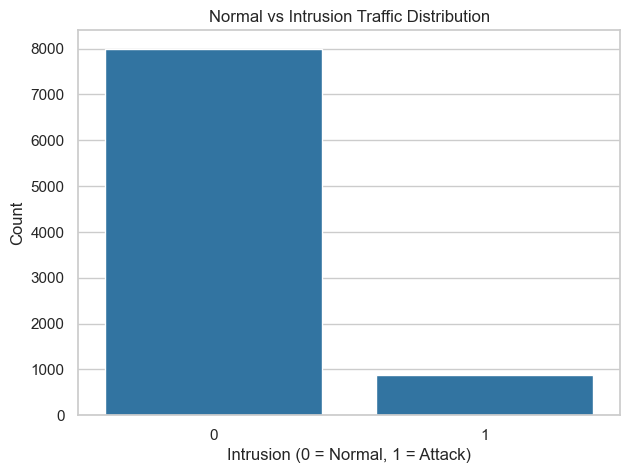

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Intrusion")
plt.title("Normal vs Intrusion Traffic Distribution")
plt.xlabel("Intrusion (0 = Normal, 1 = Attack)")
plt.ylabel("Count")
plt.show()


### Distribution of Intrusion vs Normal Trafffic:
Higher intrusion density supports the claim that Ugandan networks face growing attack activity.

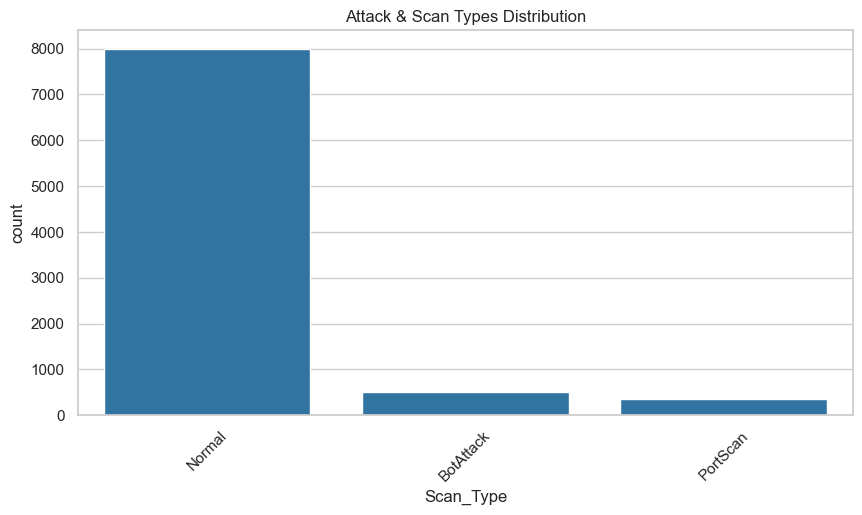

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Scan_Type", order=df['Scan_Type'].value_counts().index)
plt.title("Attack & Scan Types Distribution")
plt.xticks(rotation=45)
plt.show()

#### Scan Type Frequency:
Identification of attacks showing the common attack vectors(e.g., port scans, brute force probes) in academic networks.

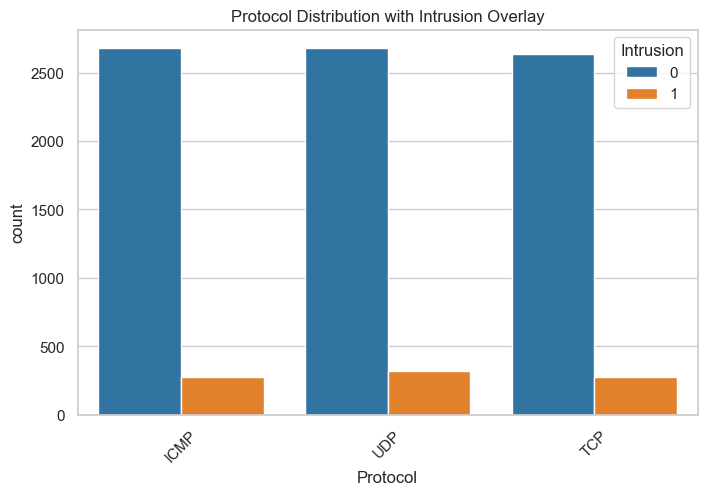

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Protocol", hue="Intrusion")
plt.title("Protocol Distribution with Intrusion Overlay")
plt.xticks(rotation=45)
plt.show()

#### Protocol Usage — Detecting Abnormal Behavior
Shows how attackers misuse protocols like TCP/UDP/HTTP.

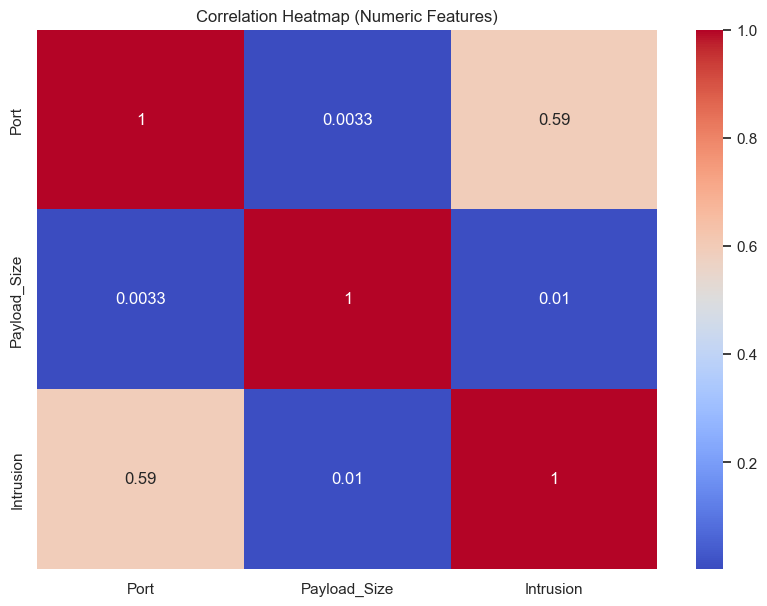

In [12]:
plt.figure(figsize=(10,7))
corr = df.select_dtypes(include=['int64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

#### Justification
Helps identify strongest predictors for your ML model.

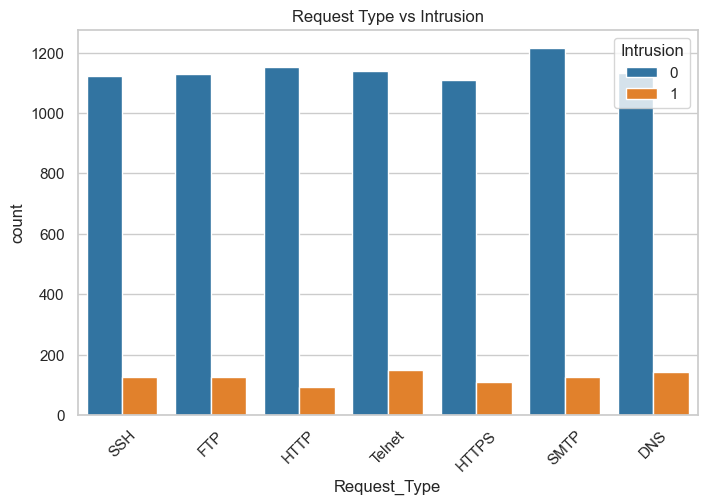

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Request_Type", hue="Intrusion")
plt.title("Request Type vs Intrusion")
plt.xticks(rotation=45)
plt.show()

#### Use in research:
Some HTTP methods are more exploited in web attacks (Example: POST for injections).

In [14]:
# Identification of numerical columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols 

Index(['Port', 'Payload_Size', 'Intrusion'], dtype='object')

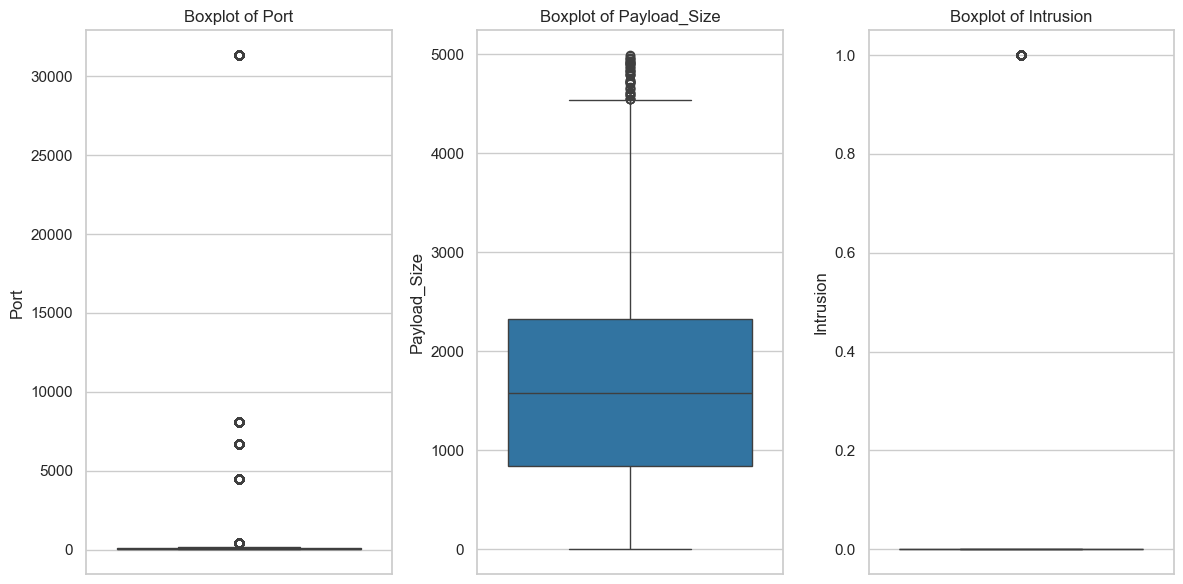

In [ ]:
# Box plot for numerical values

plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [17]:
# Identification the number of Outliers using the IQR method

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_summary

pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])


,Outlier_Count
Port,1820
Payload_Size,53
Intrusion,866


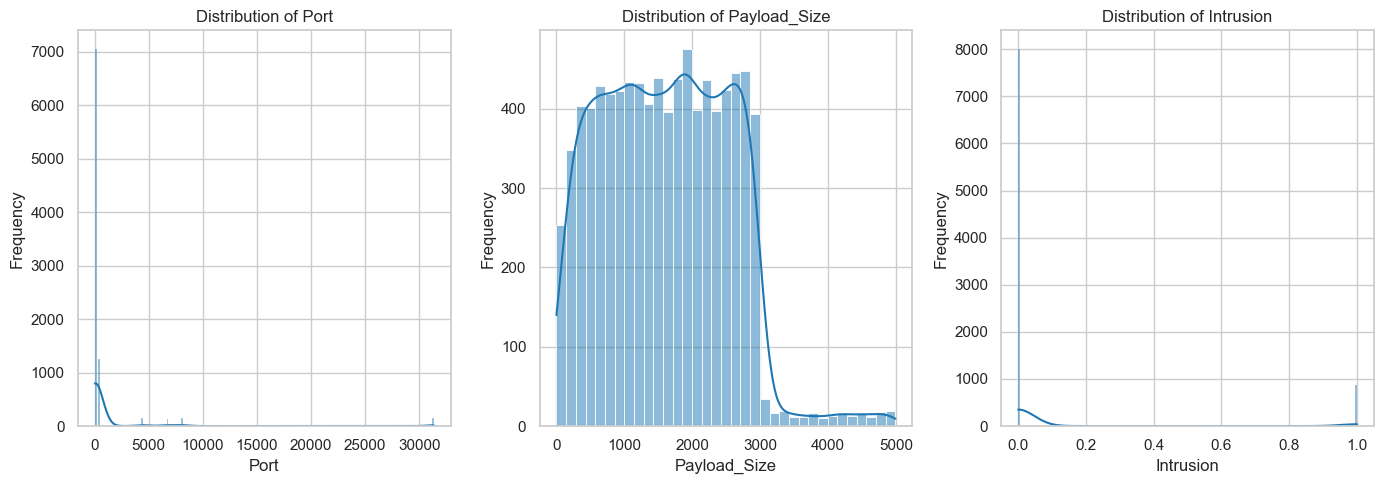

In [ ]:
#Histogram for all numerical columns

plt.figure(figsize=(14, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [19]:
# Computing Skewness and Kurtosis

dist_summary = {}

for col in numeric_cols:
    col_skew = df[col].skew()
    col_kurt = df[col].kurt()
    dist_summary[col] = {
        "Skewness": round(col_skew, 3),
        "Kurtosis": round(col_kurt, 3)
    }

dist_summary_df = pd.DataFrame(dist_summary).T
dist_summary_df


,Skewness,Kurtosis
Port,6.552,44.563
Payload_Size,0.330,-0.168
Intrusion,2.711,5.350


In [20]:
# Interpretation of the values
def interpret_skewness(value):
    if value > 1:
        return "Highly positively skewed (long right tail)"
    elif 0.5 < value <= 1:
        return "Moderately positively skewed"
    elif -0.5 <= value <= 0.5:
        return "Approximately symmetric"
    elif -1 <= value < -0.5:
        return "Moderately negatively skewed"
    else:
        return "Highly negatively skewed (long left tail)"

def interpret_kurtosis(value):
    if value > 3:
        return "Leptokurtic (heavy tails, peakier than normal)"
    elif value < 3:
        return "Platykurtic (light tails, flatter than normal)"
    else:
        return "Mesokurtic (normal distribution shape)"

# Generate interpretation
interpretation = {}

for col in numeric_cols:
    s = df[col].skew()
    k = df[col].kurt()

    interpretation[col] = {
        "Skewness_Interpretation": interpret_skewness(s),
        "Kurtosis_Interpretation": interpret_kurtosis(k)
    }

pd.DataFrame(interpretation).T



,Skewness_Interpretation,Kurtosis_Interpretation
Port,Highly positively skewed (long right tail),"Leptokurtic (heavy tails, peakier than normal)"
Payload_Size,Approximately symmetric,"Platykurtic (light tails, flatter than normal)"
Intrusion,Highly positively skewed (long right tail),"Leptokurtic (heavy tails, peakier than normal)"
